In [159]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from study_library import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
first_analysis = analysis()

In [165]:
first_analysis.n_shapes = 200
score_arrays, df1_arrays = first_analysis.run_study_mindiff_score(number_of_samples = 10, seed_interval = [3,10])

<Figure size 640x480 with 0 Axes>

/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_93225/831726247.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(score_arrays, labels = np.linspace(3,9,7), vert=True)


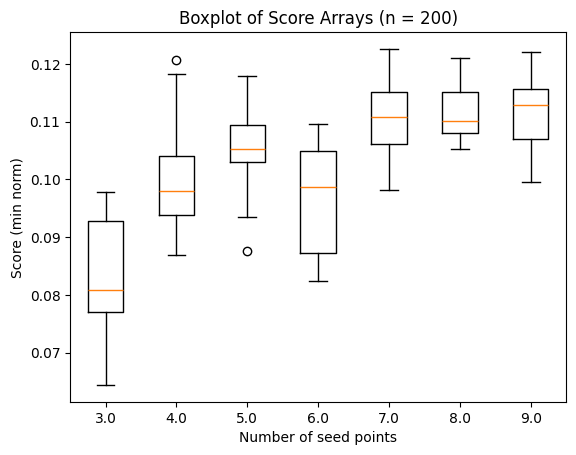

In [166]:
plt.boxplot(score_arrays, labels = np.linspace(3,9,7), vert=True)
plt.title("Boxplot of Score Arrays (n = 200)")
plt.xlabel("Number of seed points")
plt.ylabel("Score (min norm)")
plt.show()

In [189]:
first_analysis.n_shapes = 1000
all_ind = first_analysis.spectrogram(seed_interval = [3,10])



In [75]:
var, mean, var_angle, mean_angle, df1,spectra = all_ind[0]

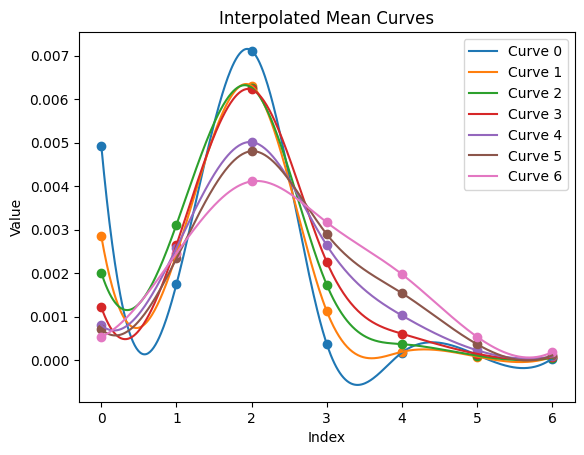

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# means_array should be a 2D array: shape (num_curves, num_points)
for i, mean_curve in enumerate(all_ind):  # Loop through each mean curve
    mean_curve = mean_curve[0][0:7]
    x = np.arange(mean_curve.shape[0])
    x_smooth = np.linspace(x.min(), x.max(), 500)
    spline = make_interp_spline(x, mean_curve, k=3)
    y_smooth = spline(x_smooth)
    plt.plot(x_smooth, y_smooth, label=f'Curve {i}')
    plt.scatter(x, mean_curve)

plt.title("Interpolated Mean Curves")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


In [175]:
all_ind[0]

(array([5.44326143e-03, 1.69460273e-03, 7.18706201e-03, 3.85109084e-04,
        1.76764240e-04, 1.15752010e-04, 3.65108483e-05, 1.71559269e-05,
        1.33348372e-05, 9.03503908e-06, 4.72443652e-06, 3.14604927e-06,
        2.89938149e-06, 1.66984494e-06, 1.29715336e-06, 1.08881168e-06,
        8.47123724e-07, 6.68810684e-07, 4.53388333e-07, 5.32474831e-07]),
 array([0.42613196, 0.03609453, 0.08137375, 0.02610339, 0.01241467,
        0.01180336, 0.00638428, 0.00433399, 0.00404296, 0.00304447,
        0.00233131, 0.00182868, 0.00182392, 0.00126604, 0.00129951,
        0.0011252 , 0.00092719, 0.00094943, 0.00067557, 0.00080752]),
 array([0.        , 3.03963003, 2.2439748 , 0.67261605, 2.39658899,
        1.43566409, 1.56864764, 1.5582824 , 1.32844559, 1.45499931,
        1.39305777, 1.55856528, 1.36668676, 1.87505423, 1.13388427,
        1.51964407, 1.68354913, 1.11465807, 1.7610988 , 1.42940213]),
 array([ 0.        ,  0.55232082, -0.23362094,  0.11707639, -0.0577584 ,
        -0.100699

In [190]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp

# Simulated structure of all_ind
all_ind = []
for _ in range(7):
    curves = {
        "curve_points": pd.Series([np.random.rand(10, 3) - 0.5 for _ in range(5)])
    }
    means = np.random.rand(6)
    variances = np.random.rand(6) * 0.1
    dummy = None
    all_ind.append([dummy, dummy, means, variances, curves])

# Collect data
data = []

for elements in range(7):
    all_points_considered = np.linalg.norm(
        np.concatenate(np.abs(all_ind[elements][4]["curve_points"].values)), axis=1
    )
    lol = np.mean(all_points_considered)
    lol_var = np.var(all_points_considered)

    row = {
        "mean_norm": lol,
        "var_norm": lol_var
    }

    for modes in range(6):
        if modes == 0:
            continue
        mean_mode = all_ind[elements][3][modes]
        var_mode = all_ind[elements][2][modes]

        row[f"mean_mode_{modes}"] = mean_mode
        row[f"var_mode_{modes}"] = var_mode

        # Simulate samples and compute p-value
        sample = np.random.normal(loc=mean_mode, scale=np.sqrt(var_mode), size=500)
        t_stat, p_val = ttest_1samp(sample, 0)
        row[f"pval_mode_{modes}"] = p_val

    data.append(row)

# Create DataFrame and shift index
df = pd.DataFrame(data)
df.index = df.index + 3
print(df)


   mean_norm  var_norm  mean_mode_1  ...  mean_mode_5  var_mode_5   pval_mode_5
3   0.514267  0.019022     0.050980  ...     0.094436    0.357680  2.399448e-03
4   0.492754  0.015518     0.008682  ...     0.083025    0.086045  5.248727e-09
5   0.483713  0.016341     0.078245  ...     0.003271    0.448913  5.251029e-01
6   0.478018  0.020864     0.074350  ...     0.032593    0.386540  6.280530e-01
7   0.468995  0.024468     0.047705  ...     0.034031    0.671032  9.778272e-03
8   0.463601  0.014812     0.014581  ...     0.025131    0.254278  2.837355e-01
9   0.448320  0.022650     0.024262  ...     0.081711    0.200935  4.492893e-06

[7 rows x 17 columns]


In [191]:
df

,mean_norm,var_norm,mean_mode_1,var_mode_1,pval_mode_1,mean_mode_2,var_mode_2,pval_mode_2,mean_mode_3,var_mode_3,pval_mode_3,mean_mode_4,var_mode_4,pval_mode_4,mean_mode_5,var_mode_5,pval_mode_5
3,0.514267,0.019022,0.050980,0.901381,4.917974e-02,0.014548,0.513084,0.796911,0.007466,0.707798,2.169898e-01,0.047203,0.376978,3.833076e-07,0.094436,0.357680,2.399448e-03
4,0.492754,0.015518,0.008682,0.447691,6.030503e-01,0.090364,0.334858,0.000098,0.095145,0.423830,5.307962e-04,0.057138,0.512788,1.570682e-03,0.083025,0.086045,5.248727e-09
5,0.483713,0.016341,0.078245,0.374279,2.031877e-07,0.012259,0.542002,0.065751,0.002441,0.859970,7.368519e-01,0.082687,0.102010,1.364541e-12,0.003271,0.448913,5.251029e-01
6,0.478018,0.020864,0.074350,0.893498,6.780213e-01,0.074663,0.447954,0.003649,0.070970,0.834101,2.777139e-02,0.030221,0.993524,9.568191e-01,0.032593,0.386540,6.280530e-01
7,0.468995,0.024468,0.047705,0.099270,1.579375e-01,0.042663,0.556985,0.239368,0.008196,0.922679,7.421466e-01,0.007048,0.537477,1.296782e-01,0.034031,0.671032,9.778272e-03
8,0.463601,0.014812,0.014581,0.728563,4.829282e-01,0.012215,0.616540,0.466926,0.034945,0.745638,3.127257e-01,0.030631,0.602844,2.053010e-01,0.025131,0.254278,2.837355e-01
9,0.448320,0.022650,0.024262,0.114770,7.285566e-01,0.050891,0.151564,0.211744,0.071304,0.073005,3.601266e-12,0.076706,0.698511,7.922072e-04,0.081711,0.200935,4.492893e-06


In [185]:
df.index = df.index + 3

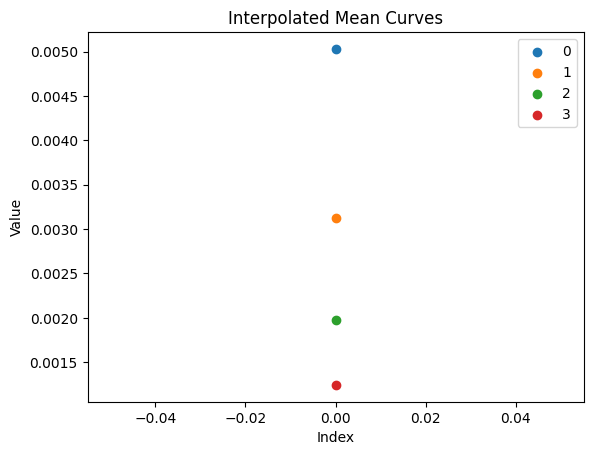

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# means_array should be a 2D array: shape (num_curves, num_points)
for i, mean_curve in enumerate(all_ind):  # Loop through each mean curve
    mean_curve = mean_curve[0][0]
    x = 0
    plt.scatter(x, mean_curve, label = i)

plt.title("Interpolated Mean Curves")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

In [101]:
mean_curve

np.float64(0.0050295979153581645)

In [ ]:
n_pts = 5
equ_dim_lim = 1.5
latin_gen = qmc.LatinHypercube(d=2)
latin_gen = latin_gen.random(n=n_pts)
latin_gen = equ_dim_lim * latin_gen

In [156]:
latin_gen

array([[0.21056609, 0.69652839],
       [1.15941898, 1.27420176],
       [1.34392583, 0.91672231],
       [0.66944093, 0.30928393],
       [0.54782941, 0.0938753 ]])

In [133]:
max(5,2)

5

In [196]:
np.concatenate([spectra,spectra]).shape

(2000, 20)

In [198]:
np.arange(1,10,1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [199]:
1000%7

6

In [200]:
int(1000/7)

142

In [201]:
142 * 7 + 6

1000

In [202]:
weight = np.zeros(7) + 1/7

In [ ]:
lol = np.array(weight * 1000,dtype = int).sum()
residual = 1000 - lol

In [211]:
residual = 1000 - lol

In [212]:
residual

np.int64(6)